In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
del_t_sort_t=pd.read_csv("delivery_time.csv")
#reading the csv file 

# EDA

In [3]:
del_t_sort_t.head(2)

,Delivery Time,Sorting Time
0,21.0,10
1,13.5,4


In [4]:
del_t_sort_t.tail(2)

,Delivery Time,Sorting Time
19,17.83,7
20,21.50,5


In [5]:
del_t_sort_t
# here column of delivery time is dependent data and sorting
# time is independent data because delivery time
# varrying accordingly sorting time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
#To find the data dependency on each other we will calculate corrilation
del_t_sort_t.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [7]:
dt=del_t_sort_t["Delivery Time"].values.reshape(-1,1)

In [8]:
dt

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [9]:
st=del_t_sort_t["Sorting Time"].values.reshape(-1,1)

In [10]:
st

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

# visulization of data

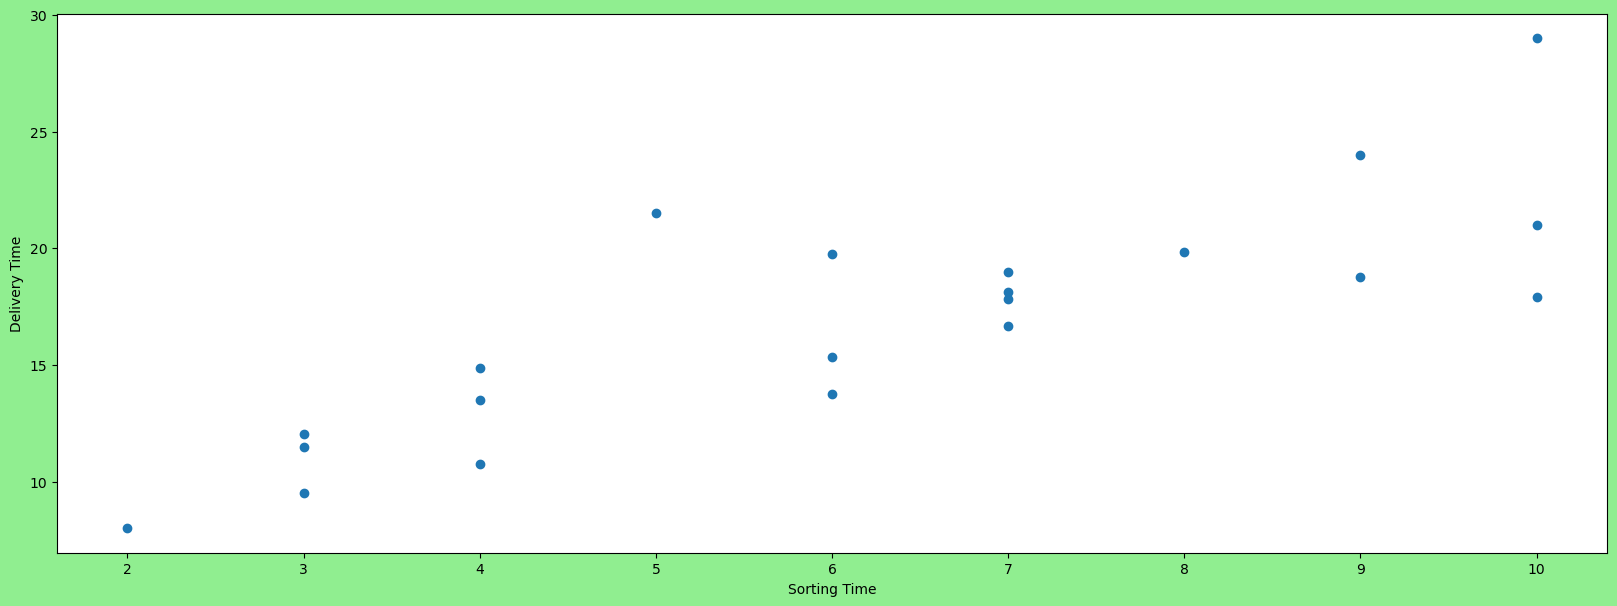

In [13]:
plt.figure(figsize=(20,7),facecolor="lightgreen")
plt.scatter(del_t_sort_t["Sorting Time"],del_t_sort_t["Delivery Time"])
plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x22c1f40ed60>,
 'caps': [<matplotlib.lines.Line2D at 0x22c1f41e370>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c1f3ff910>],
 'medians': [<matplotlib.lines.Line2D at 0x22c1f41e910>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c1f41ebe0>],
 'means': []}

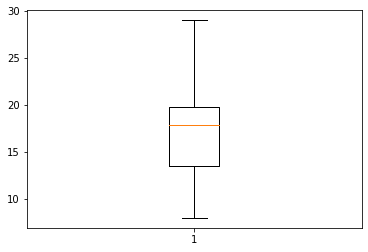

In [20]:
plt.boxplot(x=dt,data='del_t_sort_t')

# building model

In [14]:
model1 = smf.ols("dt~st", data=del_t_sort_t).fit()
#creation of model without transformation

In [20]:
model1.predict()

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [15]:
model1.params

Intercept    6.582734
st           1.649020
dtype: float64

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        11:10:08   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

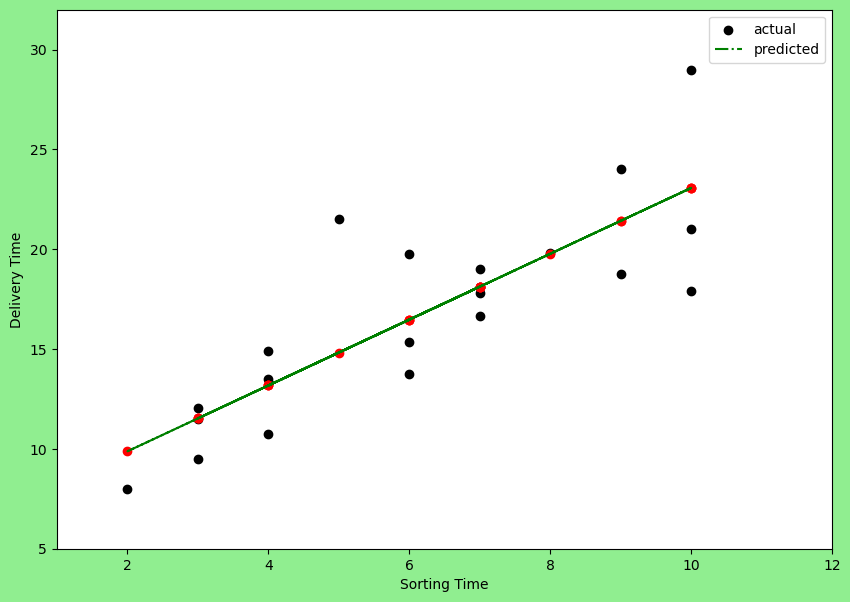

In [24]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(del_t_sort_t["Sorting Time"],(del_t_sort_t["Delivery Time"]),color="black",label="actual");
plt.plot(del_t_sort_t["Sorting Time"],model1.predict(),label="predicted",color="green",linestyle="-.");
plt.scatter(del_t_sort_t["Sorting Time"],model1.predict(),color="red")
plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")
plt.xlim(1,12)
plt.ylim(5,+32)
plt.legend(loc="best")
plt.show()

# log transformation

In [25]:
model2 = smf.ols("dt~np.log(st)", data=del_t_sort_t).fit()

In [26]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        11:20:08   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# square root transformation

In [30]:
model3 = smf.ols("dt~np.sqrt(st)", data=del_t_sort_t).fit()

In [31]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           2.61e-06
Time:                        11:36:48   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(st)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model3.predict()


array([22.57886702, 13.35434489, 16.92176102, 21.29093564, 22.57886702,
       16.92176102, 18.47940877, 11.22774181, 22.57886702, 21.29093564,
       19.92923195, 13.35434489, 18.47940877, 11.22774181, 11.22774181,
       13.35434489, 16.92176102, 18.47940877,  8.70519766, 18.47940877,
       15.22791982])

# exponential transfomation

In [32]:
model4 = smf.ols("dt~np.exp(st)", data=del_t_sort_t).fit()

In [35]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Mon, 30 Jan 2023   Prob (F-statistic):            0.00396
Time:                        11:02:58   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(st)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
model4.predict()

array([23.73908236, 15.10503289, 15.24210913, 18.26776013, 23.73908236,
       15.24210913, 15.51451022, 15.09147084, 23.73908236, 18.26776013,
       16.25497317, 15.10503289, 15.51451022, 15.09147084, 15.09147084,
       15.10503289, 15.24210913, 15.51451022, 15.08648164, 15.51451022,
       15.14189837])

# final model

model3 will be thw final model

In [38]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.61e-06
Time:                        11:06:48   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(st)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#taking model3 as best fit model with r^2 70

model3.predict()

array([22.57886702, 13.35434489, 16.92176102, 21.29093564, 22.57886702,
       16.92176102, 18.47940877, 11.22774181, 22.57886702, 21.29093564,
       19.92923195, 13.35434489, 18.47940877, 11.22774181, 11.22774181,
       13.35434489, 16.92176102, 18.47940877,  8.70519766, 18.47940877,
       15.22791982])